In [18]:
import numpy as np
from IPython.display import Image,display
import matplotlib.pyplot as plt

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
import math
import sys
from scipy.linalg import svd
# from google.colab import files
# uploaded = files.upload()
# import io
# dataset = pd.read_csv(io.BytesIO(uploaded['apparel-trainval.csv']))

# Read dataset to pandas dataframe
dataset = pd.read_csv('/home/aishwarya/CSIS/SMAI/SMAI_assig/a-5/Apparel/apparel-trainval.csv')

#we need to normalize the features using mean normalization
# dataset1=data_nrmalize(dataset)
# dataset1=(dataset.iloc[:,:-1] - dataset.mean().values)/dataset.std().values

train, validate = np.split(dataset, [int(.9*len(dataset))]) #for sequential data
# train, validate = np.split(dataset.sample(frac=1), [int(.8*len(dataset))]) # for random 

# dataset1

In [3]:
def prepare_data_X(data1):
    X= data1.iloc[:,:-1].values
    return X
    
def prepare_data_Y(data1):
    Y= data1.iloc[:,-1].values
    return Y   

In [14]:
print 'hello i am neural network'
df=validate

cols = [col for col in df if col != df.columns[0]]+[df.columns[0]]
df = df[cols]

Y=prepare_data_Y(df)
X=prepare_data_X(df)
print 'h-',Y[8]
print 'g-',Y[15]
print 'f',Y[9]
# print X

hello i am neural network
h- 9
g- 4
f 4


In [5]:
#Xor data
XORdata=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X=XORdata[:,0:2]
y=XORdata[:,-1]

In [3]:
def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [4]:
def initialize_network():
    
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=2
    
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [5]:
net=initialize_network()
display(Image("img/network.jpg"))
print_network(net)

Layer 1 
('neuron 1 :', {'weights': array([ 0.06588518,  0.47434582])})
('neuron 2 :', {'weights': array([ 0.74648194,  0.553562  ])})
('neuron 3 :', {'weights': array([ 0.64003977,  0.10537228])})
Layer 2 
('neuron 1 :', {'weights': array([ 0.75206347,  0.04883561,  0.67349945])})
('neuron 2 :', {'weights': array([ 0.59652985,  0.37145839,  0.32767015])})


In [6]:
def activate_sigmoid(sum):
    return (1/(1+np.exp(-sum)))

In [7]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=activate_sigmoid(sum)
            neuron['result']=result
            
            prev_input=np.append(prev_input,[result])
        row =prev_input
    
    return row

In [8]:
def sigmoidDerivative(output):
    return output*(1.0-output)

In [9]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results) 
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [10]:
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [11]:
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
    
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            updateWeights(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

In [12]:
errors=training(net,100000, 0.05,2)

>epoch=0,error=2.353
>epoch=10000,error=0.002
>epoch=20000,error=0.001
>epoch=30000,error=0.001
>epoch=40000,error=0.001
>epoch=50000,error=0.001
>epoch=60000,error=0.000
>epoch=70000,error=0.000
>epoch=80000,error=0.000
>epoch=90000,error=0.000


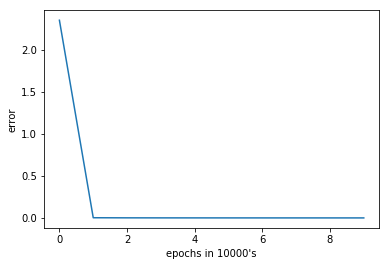

In [13]:
epochs=[0,1,2,3,4,5,6,7,8,9]
plt.plot(epochs,errors)
plt.xlabel("epochs in 10000's")
plt.ylabel('error')
plt.show()

In [14]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [15]:
pred=predict(net,np.array([1,0]))
output=np.argmax(pred)
print(output)

1


In [16]:
display(Image("img/bp.jpg"))
print_network(net)

Layer 1 
('neuron 1 :', {'weights': array([ 0.46492704,  0.88254613]), 'result': 0.6141823536332246, 'delta': 2.2671094574991028e-07})
('neuron 2 :', {'weights': array([ 1.25286048,  1.1405156 ]), 'result': 0.77779463175317853, 'delta': 1.2348876323293966e-07})
('neuron 3 :', {'weights': array([ 0.97974401,  0.5259664 ]), 'result': 0.72705741951645431, 'delta': 2.0167998849071194e-07})
Layer 2 
('neuron 1 :', {'weights': array([-2.60688597, -3.63171101, -2.74704574]), 'result': 0.0016210016812057422, 'delta': -2.2848064468254052e-07})
('neuron 2 :', {'weights': array([ 3.08878611,  3.05628137,  2.85573661]), 'result': 0.99825720645771432, 'delta': 2.5545109687502387e-07})
